In [3]:
import numpy as np
import threading
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

def matrix_multiply(A, B, result, index):
    result[index] = np.dot(A, B)

def run_with_threads(num_threads):
    start_time = time.time()
    threads = []
    for i, matrix in enumerate(matrices):
        thread = threading.Thread(target=matrix_multiply, args=(A, matrix, results, i))
        threads.append(thread)
        thread.start()
    for thread in threads:
        thread.join()
    end_time = time.time()
    return end_time - start_time

+------------------+---------+--------+--------+--------+-------+--------+--------+--------+--------+--------+
| Threads          | T=1     | T=2    | T=3    | T=4    | T=5   | T=6    | T=7    | T=8    | T=9    | T=10   |
+------------------+---------+--------+--------+--------+-------+--------+--------+--------+--------+--------+
| Time taken (sec) | 11.1089 | 6.3668 | 7.7496 | 5.9379 | 7.516 | 6.1204 | 7.3611 | 5.9054 | 7.6784 | 5.9227 |
+------------------+---------+--------+--------+--------+-------+--------+--------+--------+--------+--------+


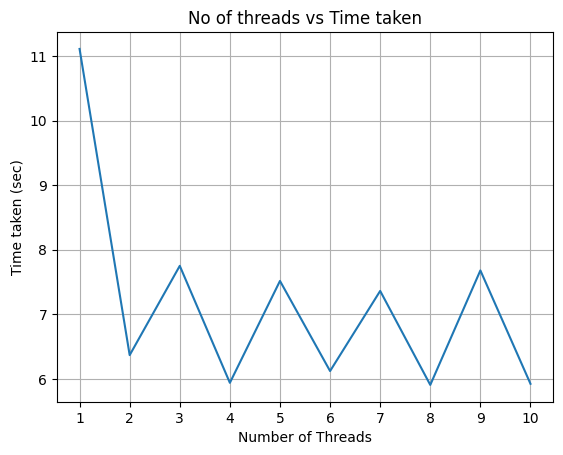

In [4]:
A = np.random.rand(1000, 1000)

results = [None] * 100

matrices = [np.random.rand(1000, 1000) for _ in range(100)] # random matrices

results_table = []
num_threads=list(range(1,11))
time_taken=[]
for num_t in num_threads:
    ttime= run_with_threads(num_t)
    time_taken.append(ttime)
    results_table.append(("T="+str(num_t), round(ttime,4)))

ans = list(zip(*results_table))

print(tabulate(ans,tablefmt="grid", showindex=["Threads", "Time taken (sec)"]))

plt.plot(num_threads, time_taken)
plt.xlabel('Number of Threads')
plt.ylabel('Time taken (sec)')
plt.title('No of threads vs Time taken')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()
